In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import phate

In [3]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [4]:
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/1KGP/WGS30X_V1/oldnow/MattsPlace'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed_V1.hdf5'

In [5]:
with h5py.File(os.path.join(exp_path, fname), 'r') as hf:
    #model_attrs = hf['gradients'][:]
    #print('loaded gradient of fc1 w.r.t. input from {}'.format(attr_fc1_saliency_name))
    inputs = hf['inputs'][:]
    class_label_names = hf['class_label_names'][:]
    class_labels = hf['class_labels'][:]
    samples = hf['samples'][:]
    snp_names = hf['snp_names'][:]

In [6]:
label_with_names = [str(class_label_names[y])[2:-1] for y in class_labels]

In [7]:
label_with_superpop_names = np.zeros_like(label_with_names)
for label in mappings.super_pops_1000G:
    index = pd.DataFrame(label_with_names).isin(mappings.super_pops_1000G[label]).values.flatten()
    label_with_superpop_names[index] = label

In [8]:
def plot_embeddings_1000G_labels(emb, labels, palette, label_order, ax):
    
    sns.scatterplot(x=emb[:,0],
                    y=emb[:,1],
                    ax=ax,
                    palette=palette,
                    hue_order=label_order,
                    hue=pd.Categorical(labels))
    ax.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left')

    for label in np.unique(labels):
        index = label == labels
        mean_pos = emb[index,:2].mean(0)
        ax.text(x=mean_pos[0], 
                y=mean_pos[1], 
                s=label)

In [9]:
import sklearn
pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
pca_input = pca_obj.fit_transform(inputs)

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 2.90 seconds.
Calculated landmark operator in 3.56 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.76 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD 

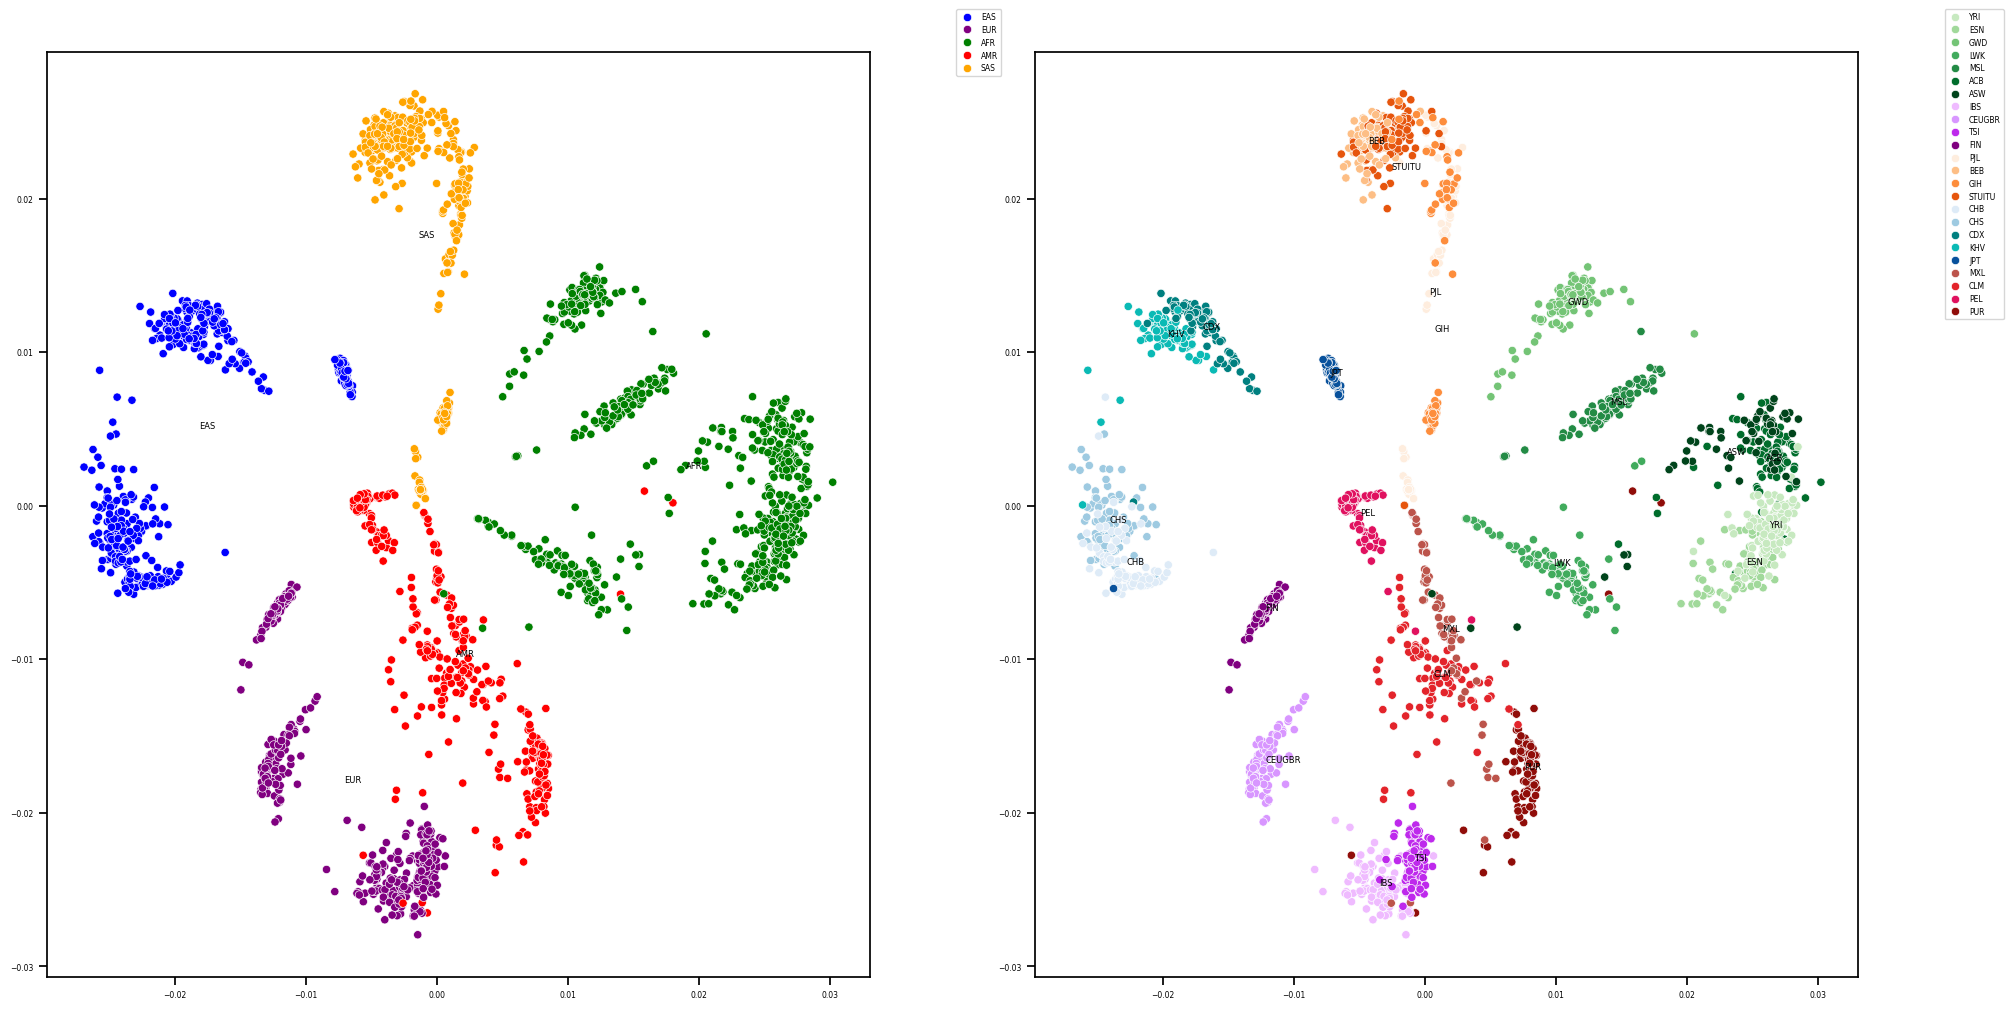

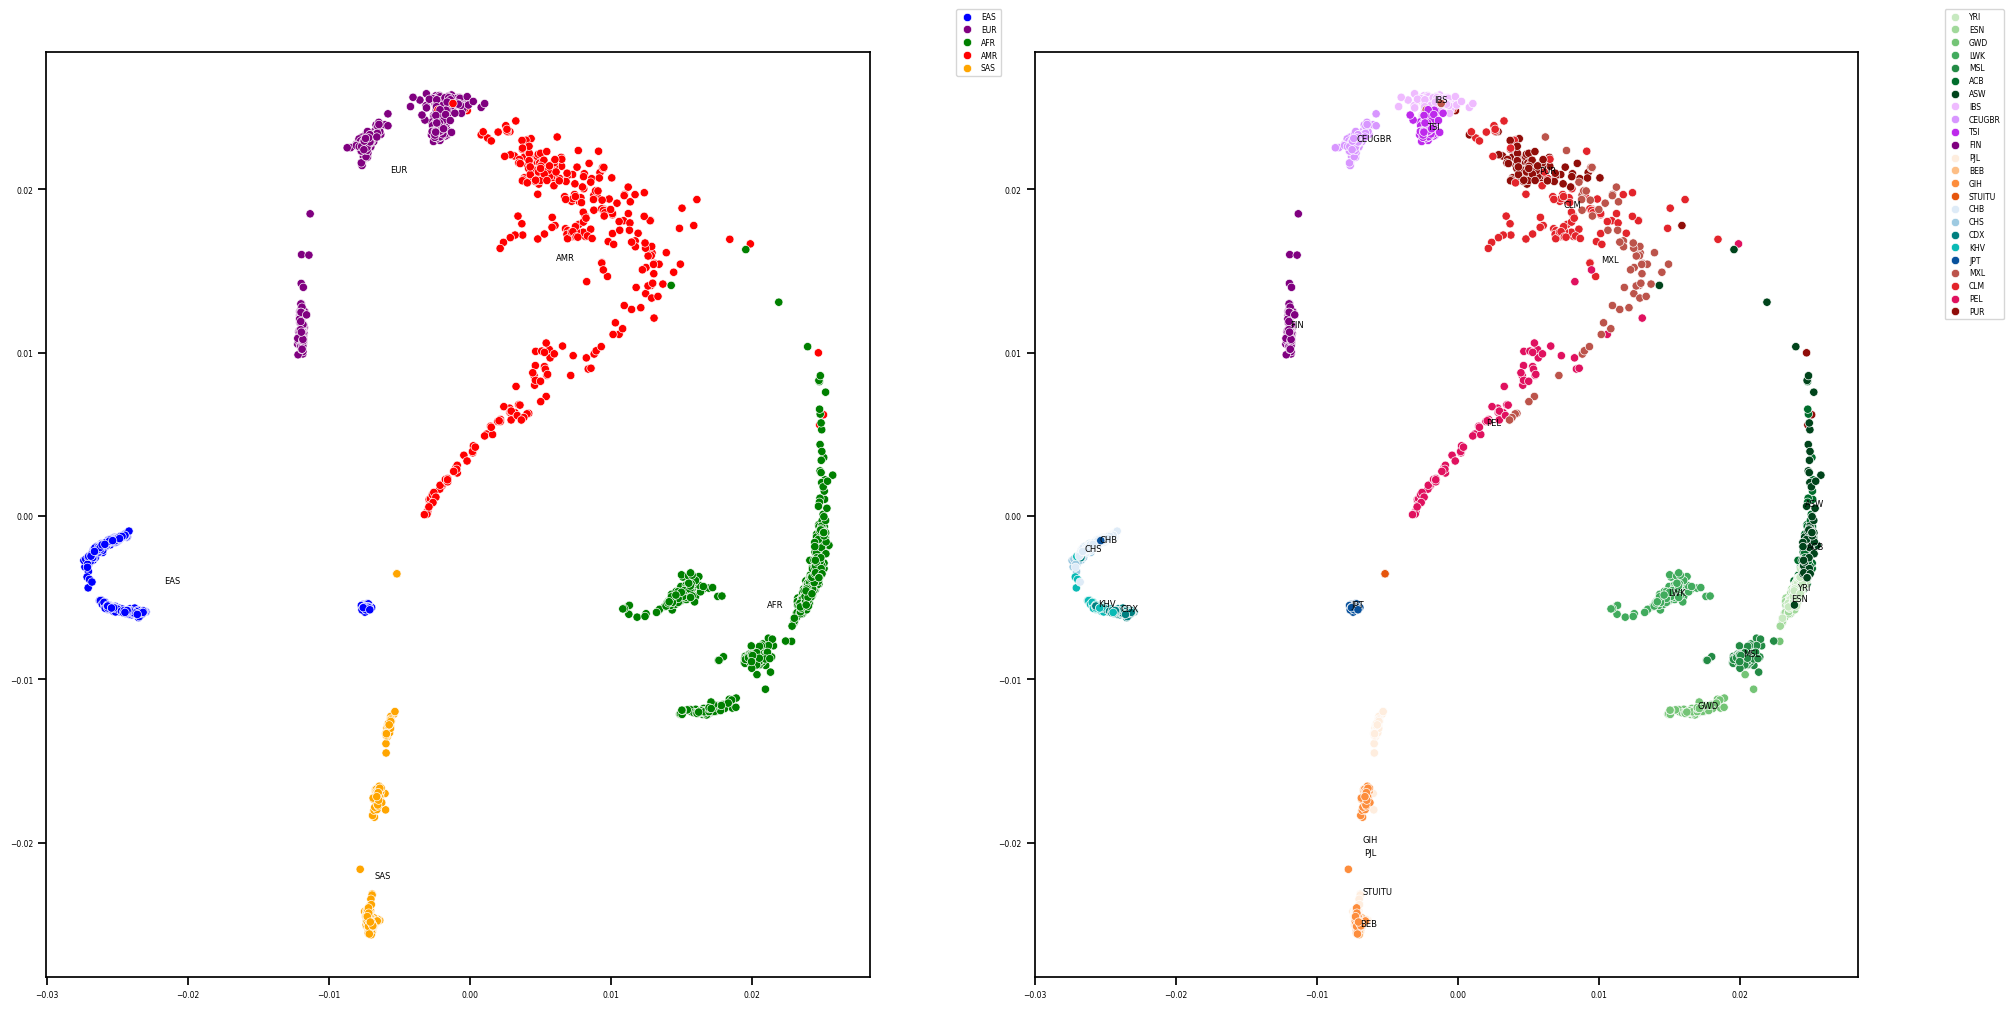

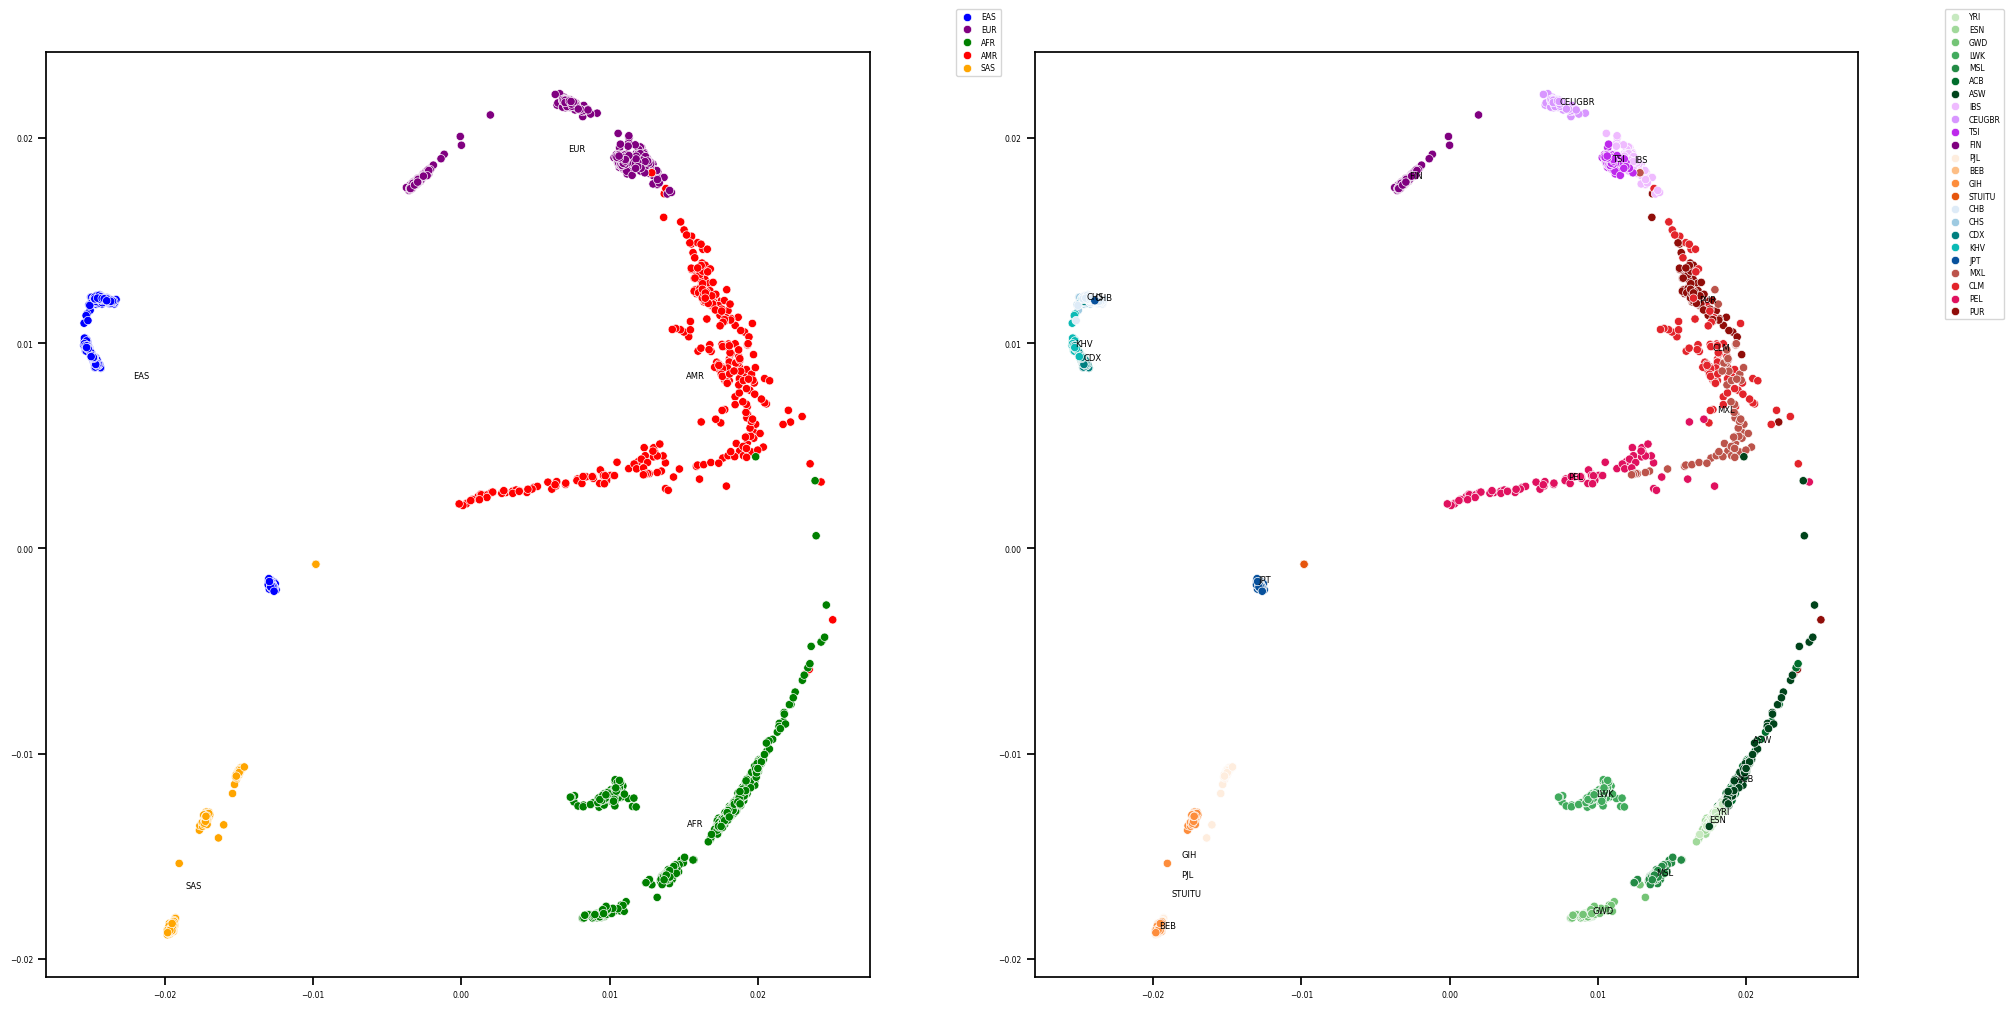

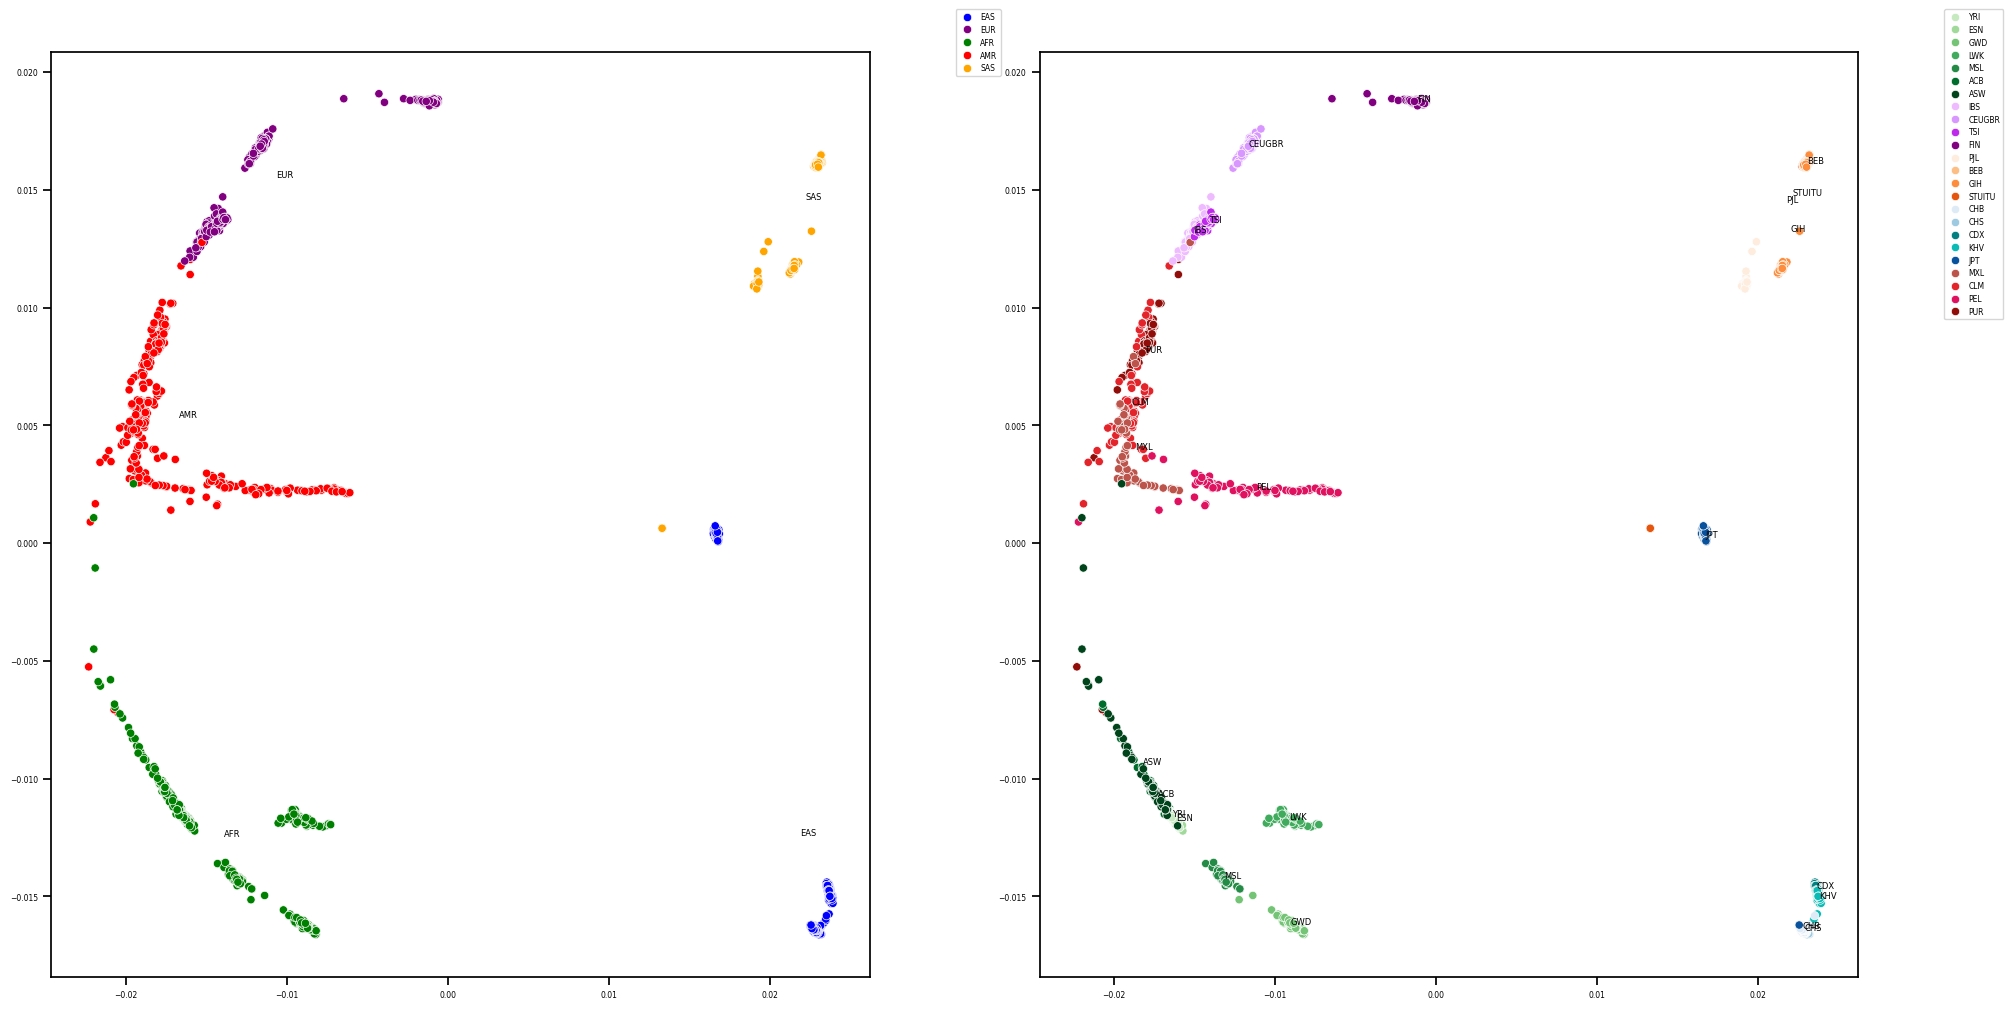

In [11]:
for t in (1,5,10,20):
# initial 2D phate embedding
    phate_operator42_2d = phate.PHATE(random_state=42, 
                                      n_components=2, 
                                      knn=5, 
                                      n_pca=None,
                                      decay=60,
                                      t=t,
                                      gamma=1.)
    phate_operator42_2d.fit(pca_input)
    phate_emb42_2d = phate_operator42_2d.transform()

    fig, ax = plt.subplots(ncols=2, figsize=(20,10))
    plot_embeddings_1000G_labels(phate_emb42_2d, 
                                 np.array(label_with_superpop_names), 
                                 mappings.pop_pallette_1000G_coarse,
                                 mappings.label_order_1000G_coarse,
                                 ax[0])
    plot_embeddings_1000G_labels(phate_emb42_2d, 
                                 np.array(label_with_names),
                                 mappings.pop_pallette_1000G_fine,
                                 mappings.label_order_1000G_fine,
                                 ax[1])
    plt.tight_layout()

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.33 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 2.61 seconds.
Calculated landmark operator in 3.26 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.61 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.74 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD 

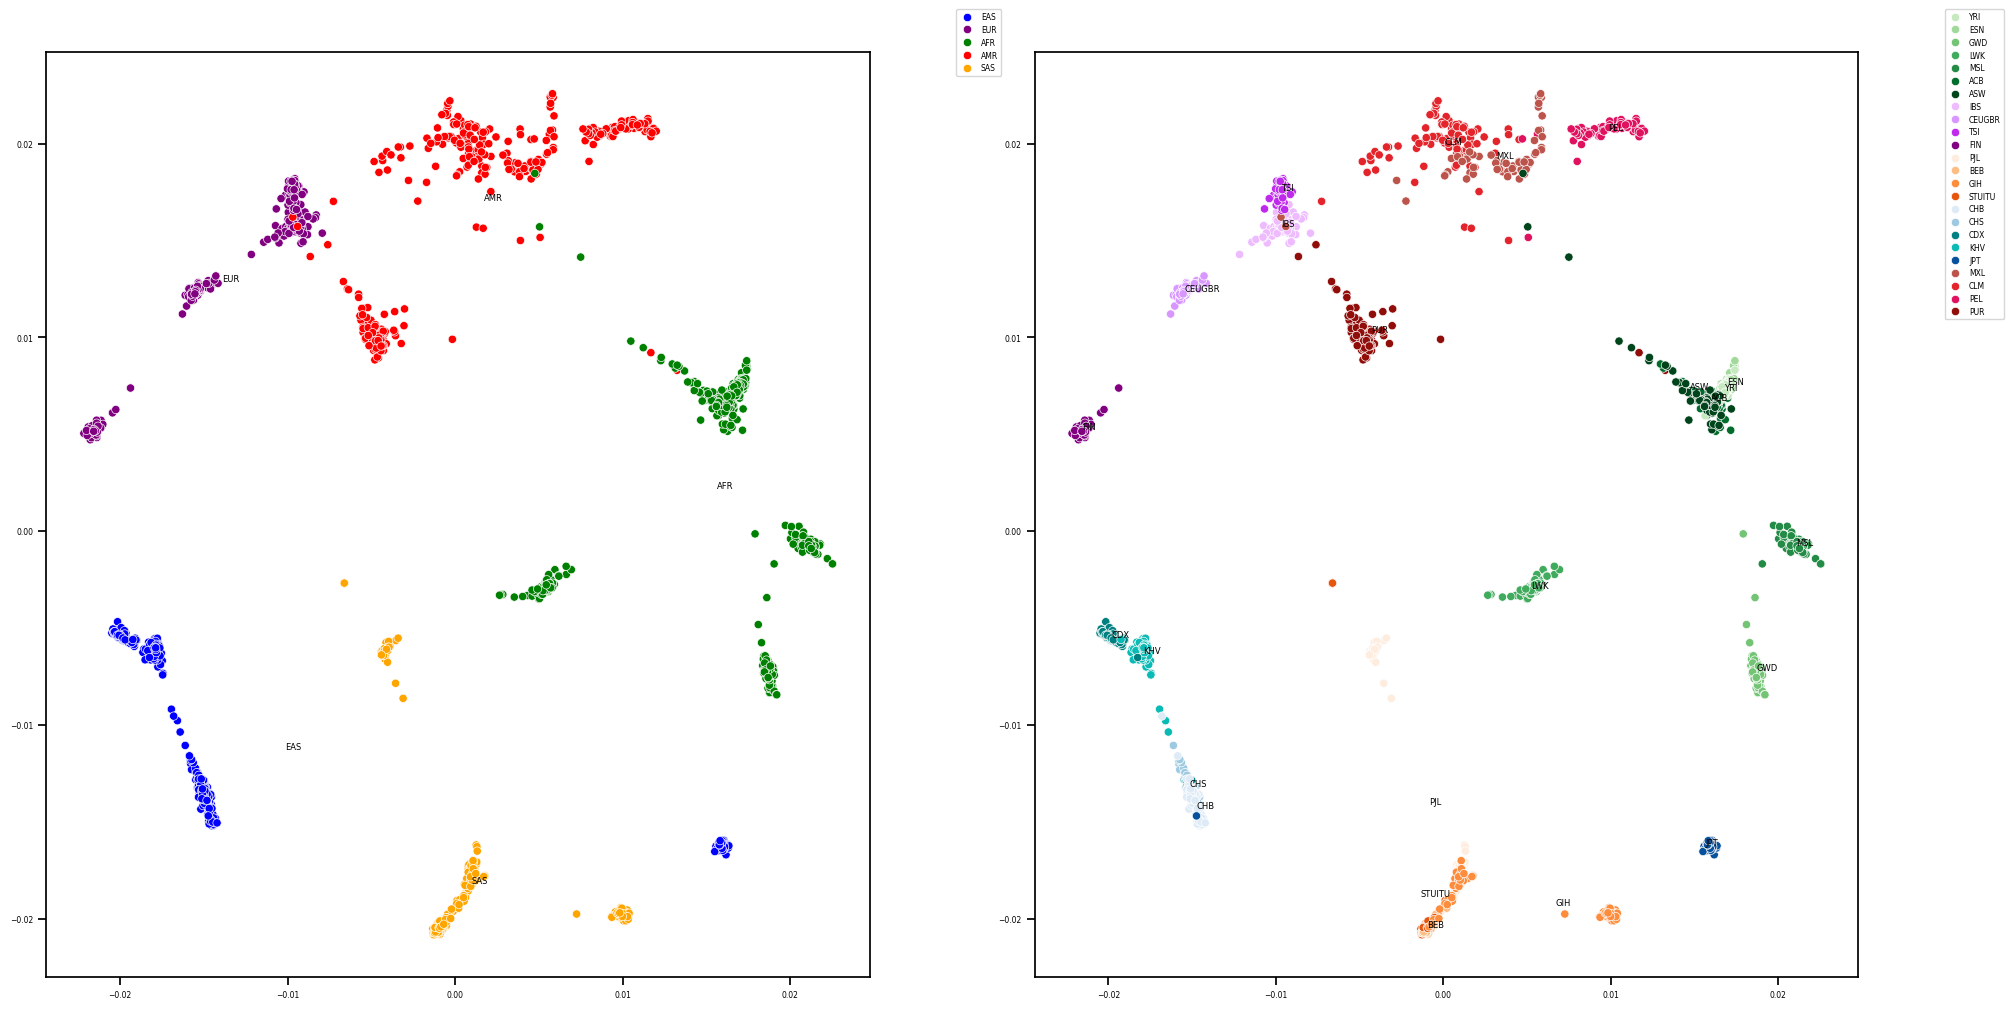

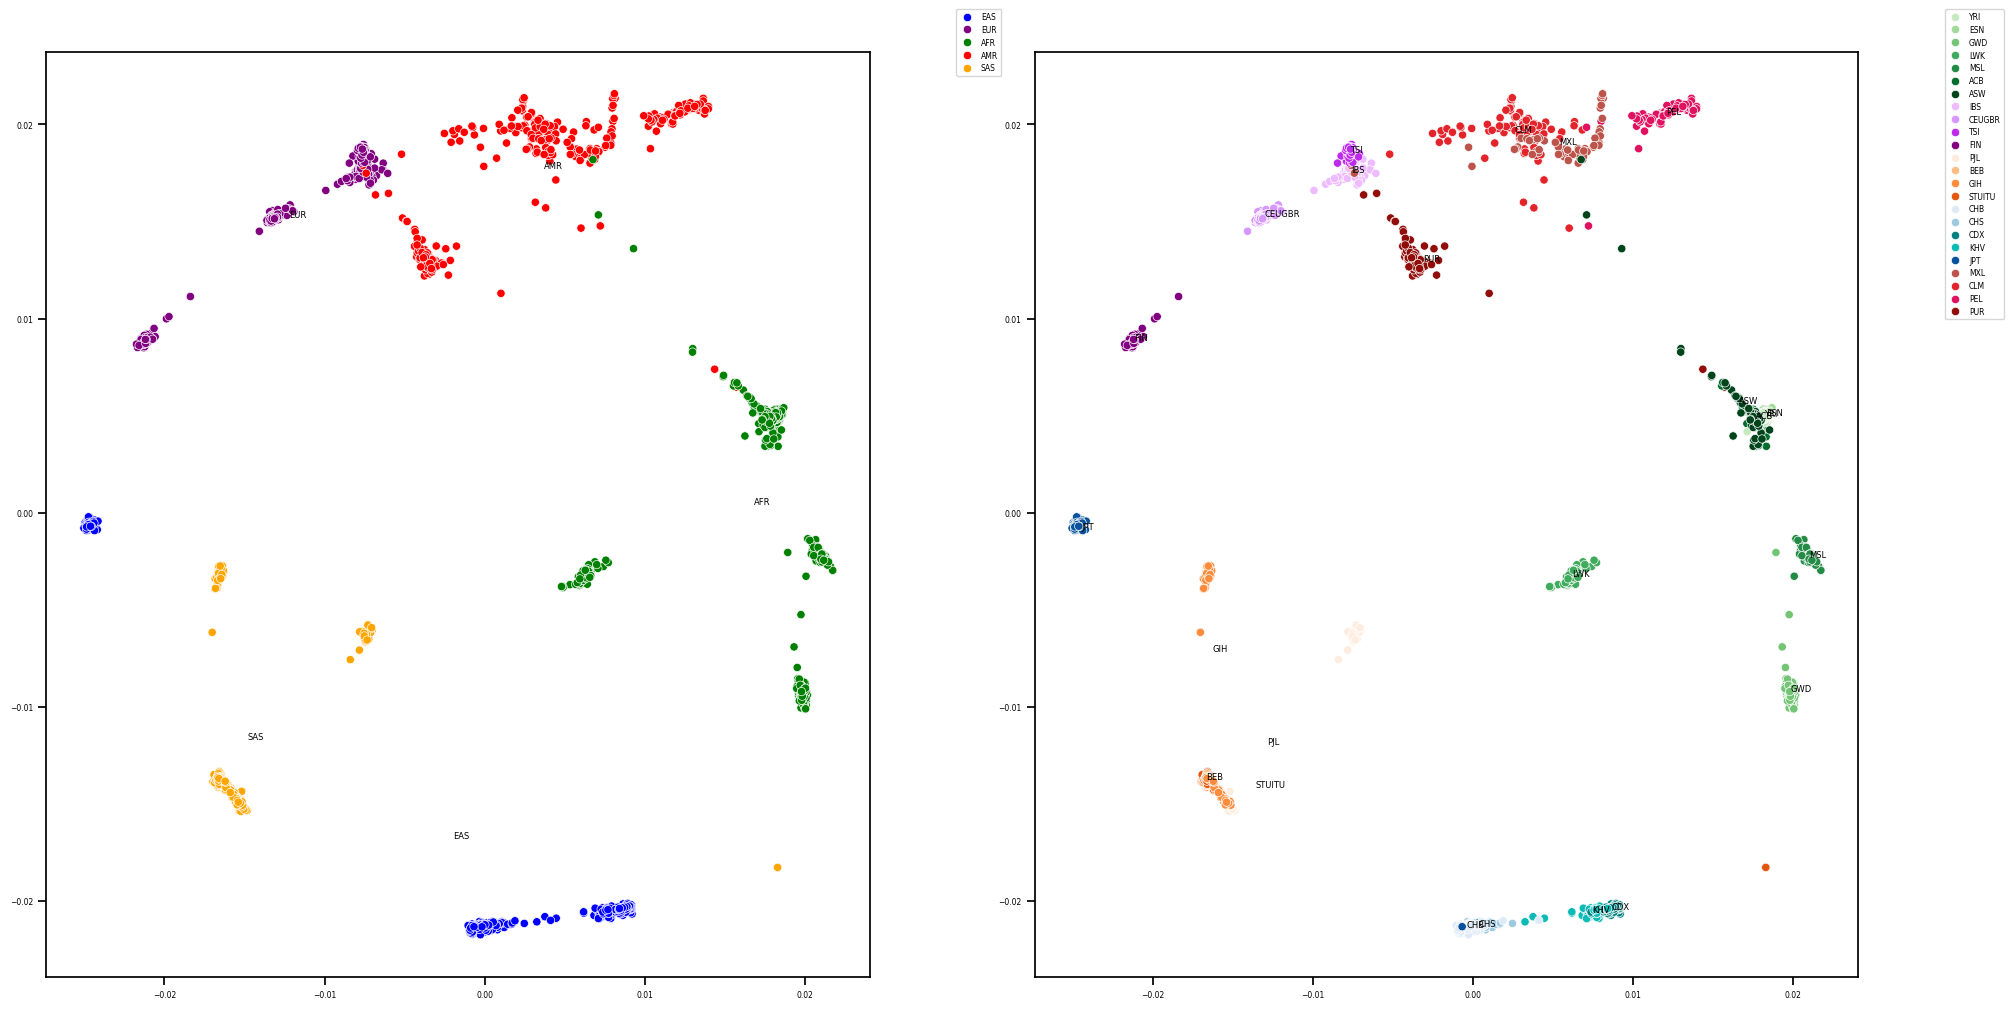

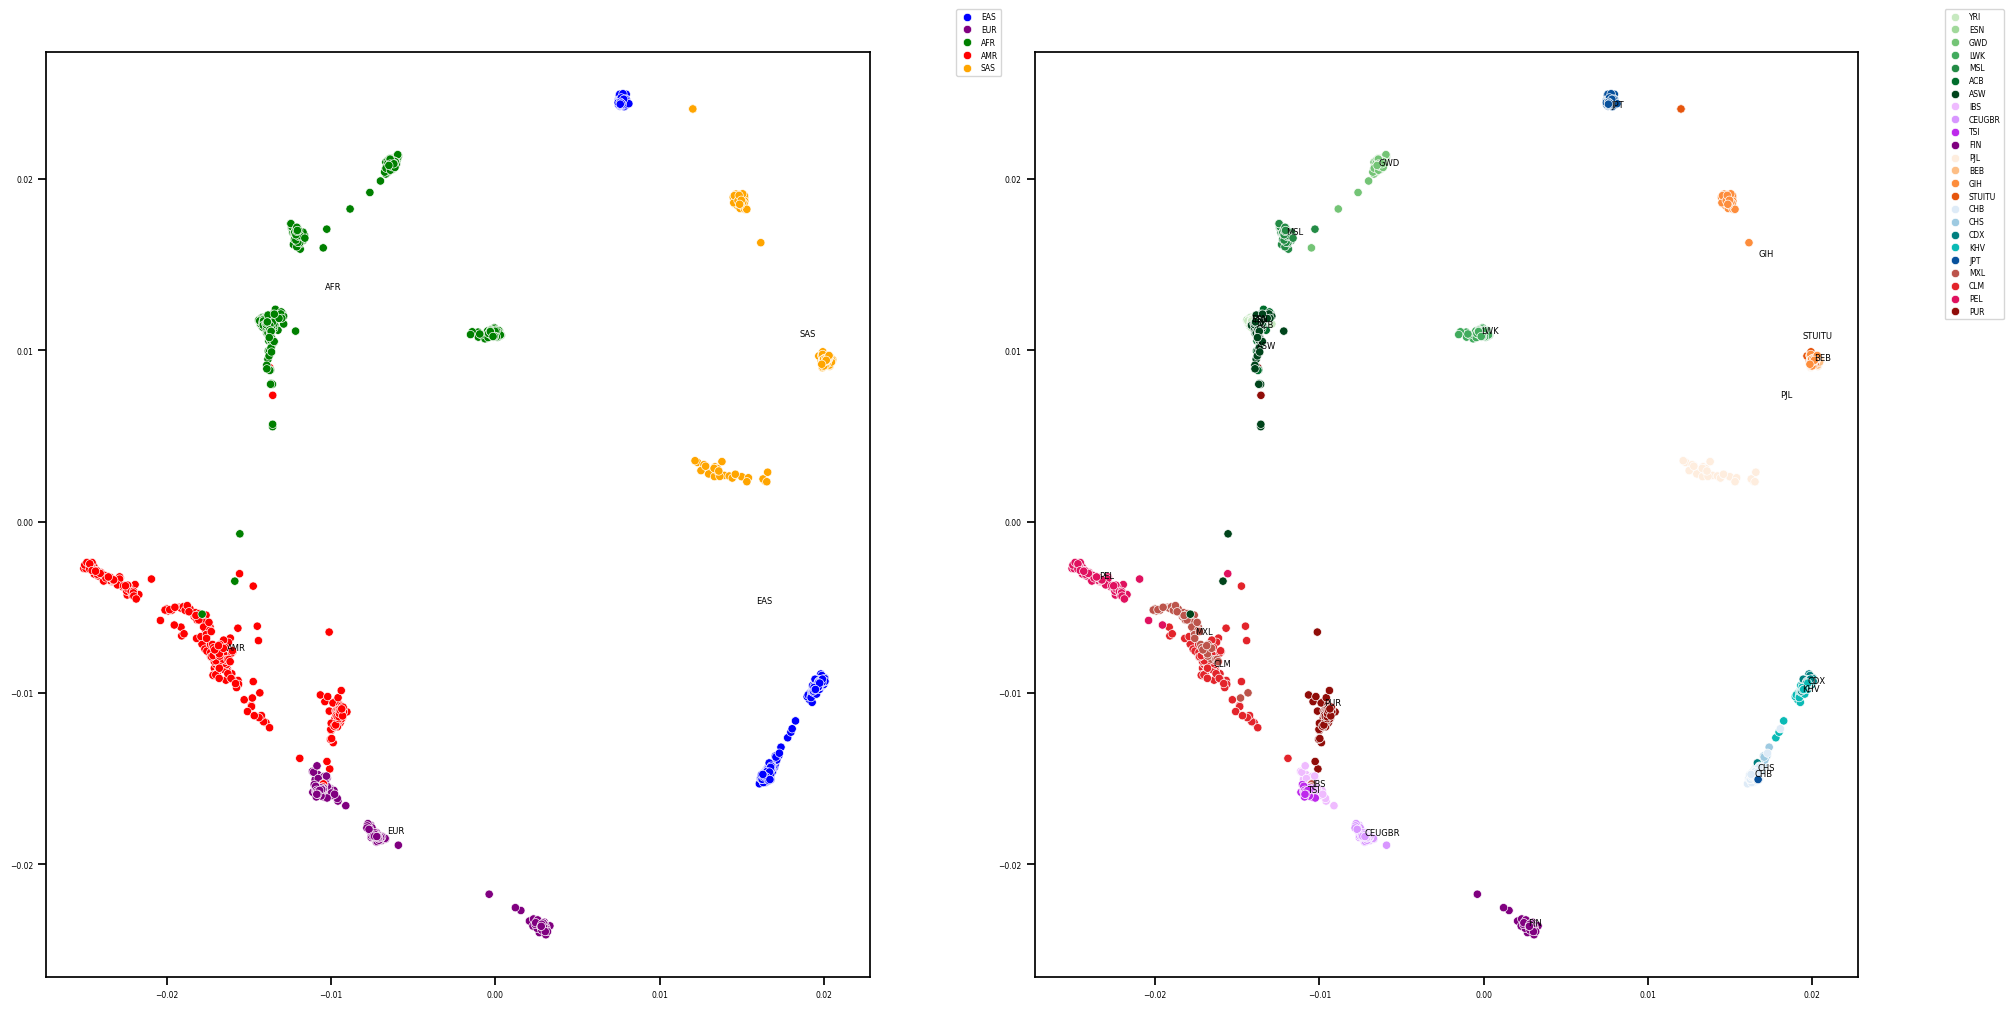

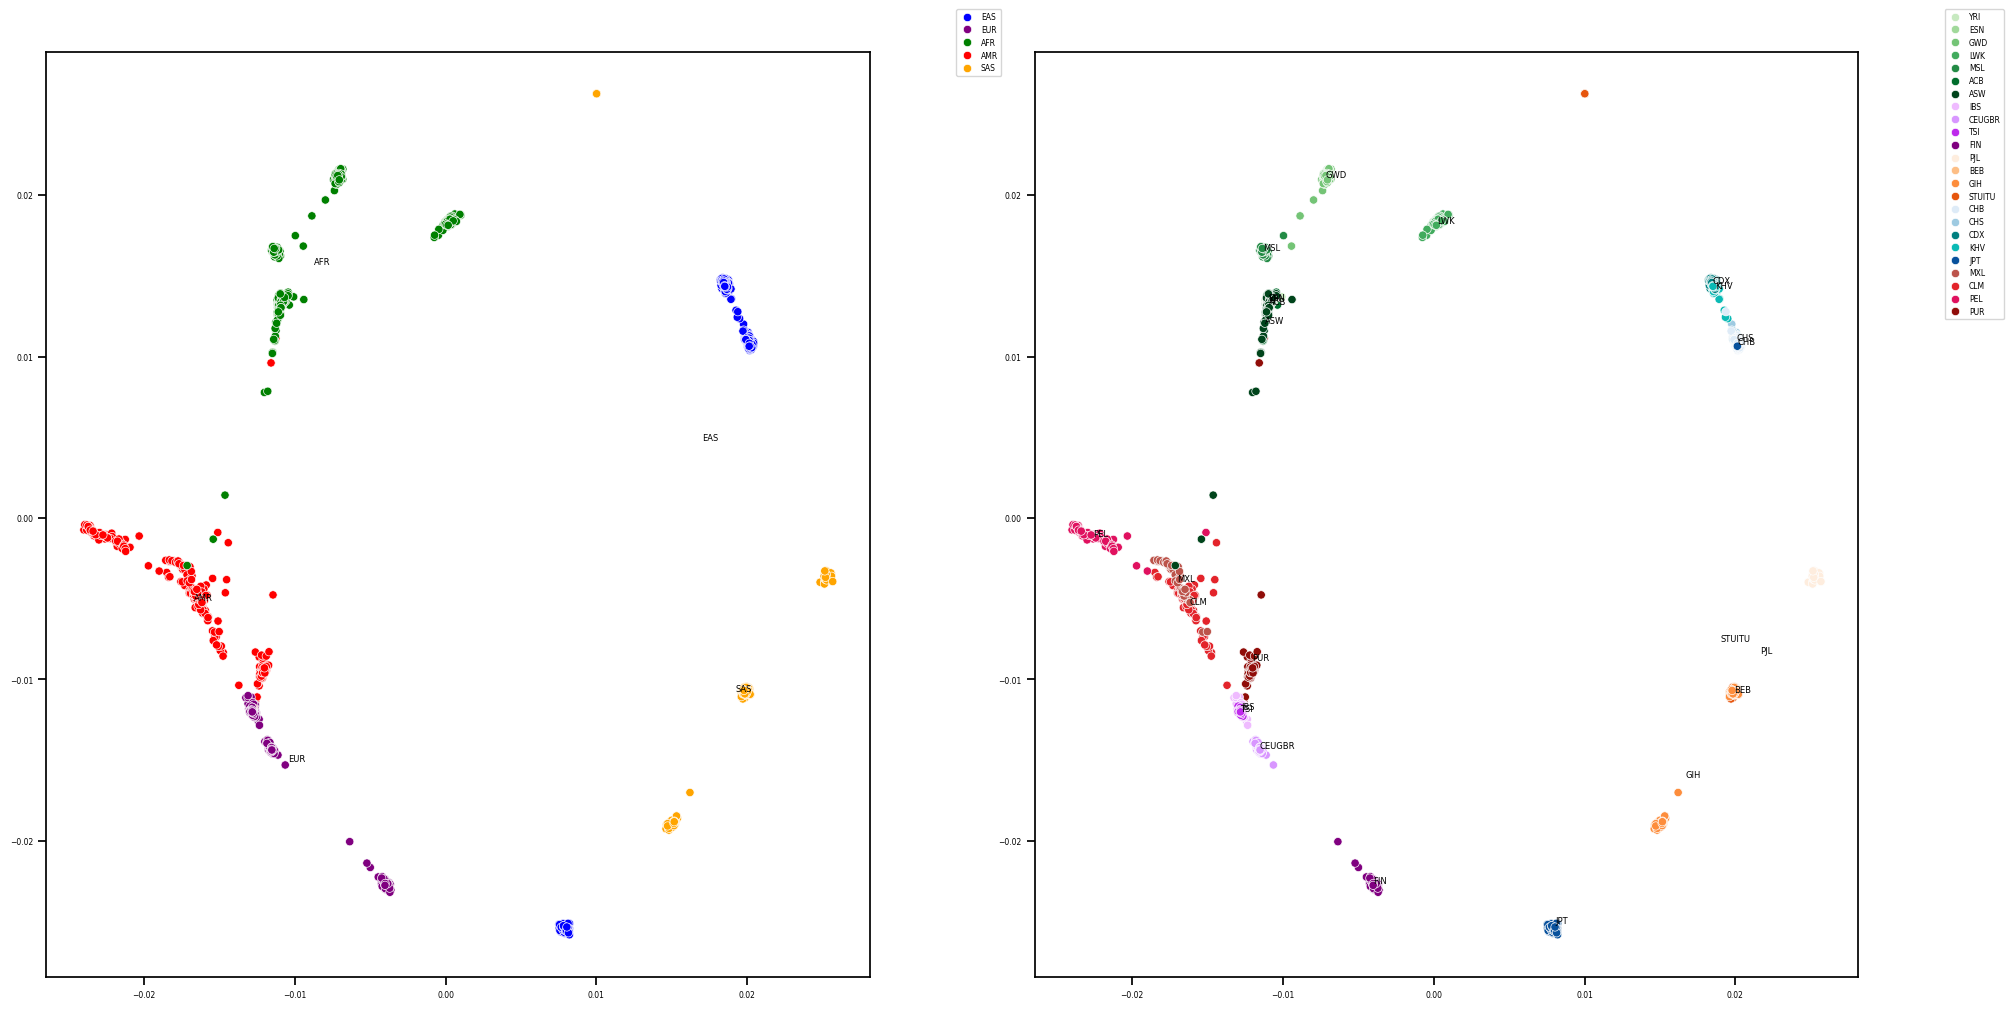

In [18]:
for t in (5, 10, 20, 40):
# initial 2D phate embedding
    phate_operator42_2d = phate.PHATE(random_state=42, 
                                      n_components=2, 
                                      knn=5, 
                                      n_pca=None,
                                      decay=60,
                                      t=t,
                                      gamma=0.)
    phate_operator42_2d.fit(pca_input)
    phate_emb42_2d = phate_operator42_2d.transform()

    fig, ax = plt.subplots(ncols=2, figsize=(20,10))
    plot_embeddings_1000G_labels(phate_emb42_2d, 
                                 np.array(label_with_superpop_names), 
                                 mappings.pop_pallette_1000G_coarse,
                                 mappings.label_order_1000G_coarse,
                                 ax[0])
    plot_embeddings_1000G_labels(phate_emb42_2d, 
                                 np.array(label_with_names),
                                 mappings.pop_pallette_1000G_fine,
                                 mappings.label_order_1000G_fine,
                                 ax[1])
    plt.tight_layout()

## Admix Ratios

In [12]:
sample_ids = pd.read_csv('notebooks/MyAdmix/output_ids.txt', sep=' ', header=None)
admix_ratios = pd.read_csv('notebooks/MyAdmix/AMR_ACB_ASW.3.Q', sep=' ', header=None)

admix_labels_custom = np.zeros([len(label_with_names), 3])
admix_df = pd.concat([admix_ratios, sample_ids], axis=1)
admix_df.columns = ['admix 1', 'admix 2', 'admix 3' , 'sample id']

labels2 = np.array([sample.decode("utf-8") for sample in samples])
matching_indices = np.array([np.where(admix_df['sample id'][j] == labels2)[0][0] if len(np.where(admix_df['sample id'][j] == labels2)[0]) > 0 else -1 for j in range(len(admix_df))])

for i, idx in enumerate(matching_indices):
    if idx != -1:
        admix_labels_custom[idx] = admix_df.iloc[i].values[:3]
        
admix_labels_custom2 = admix_labels_custom
admix_labels_custom2[label_with_superpop_names == 'EUR', 2] = 1
admix_labels_custom2[label_with_superpop_names == 'AFR', 0] = 1

Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.11 seconds.
  Calculating KMeans...
  Calculated KMeans in 0.99 seconds.
Calculated landmark operator in 1.65 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.02 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.74 seconds.
Running PHATE on 2322 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.32 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD 

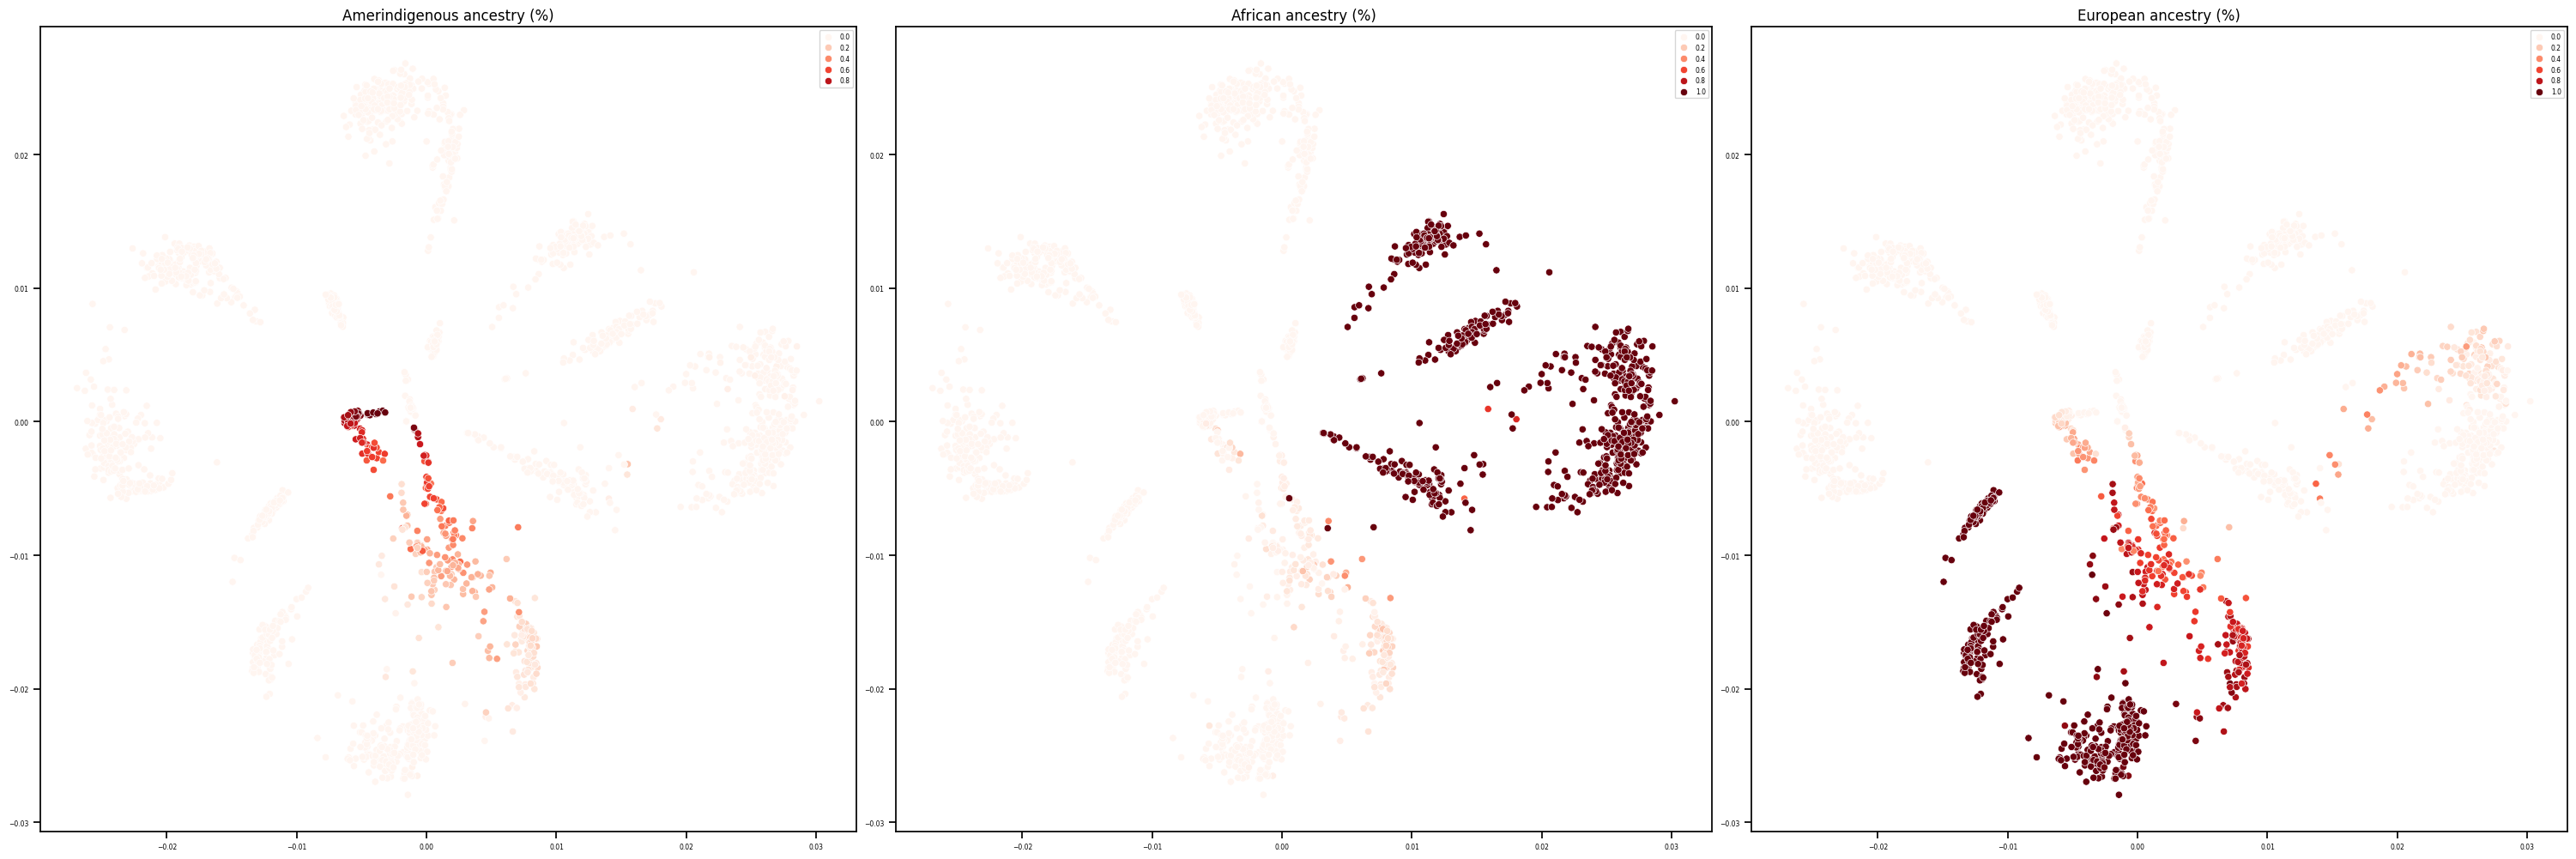

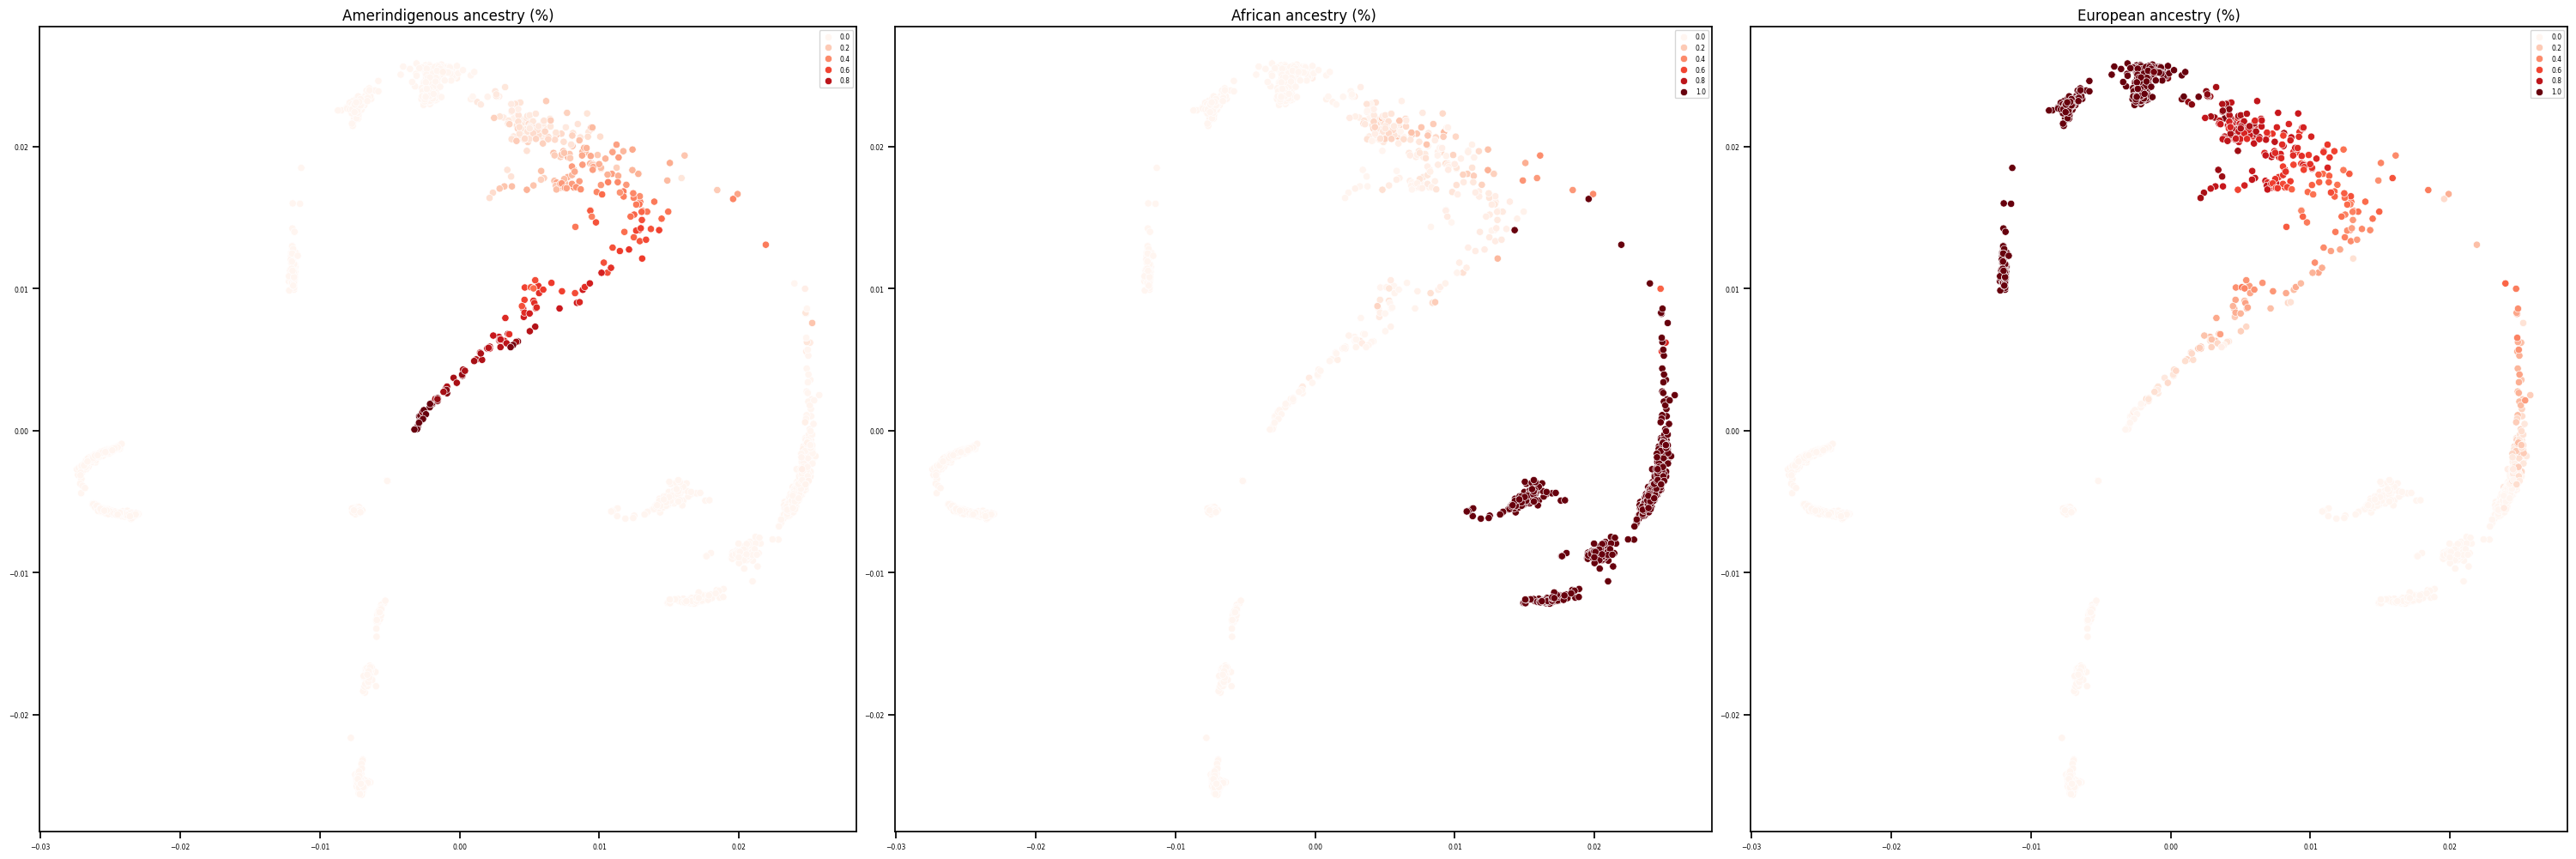

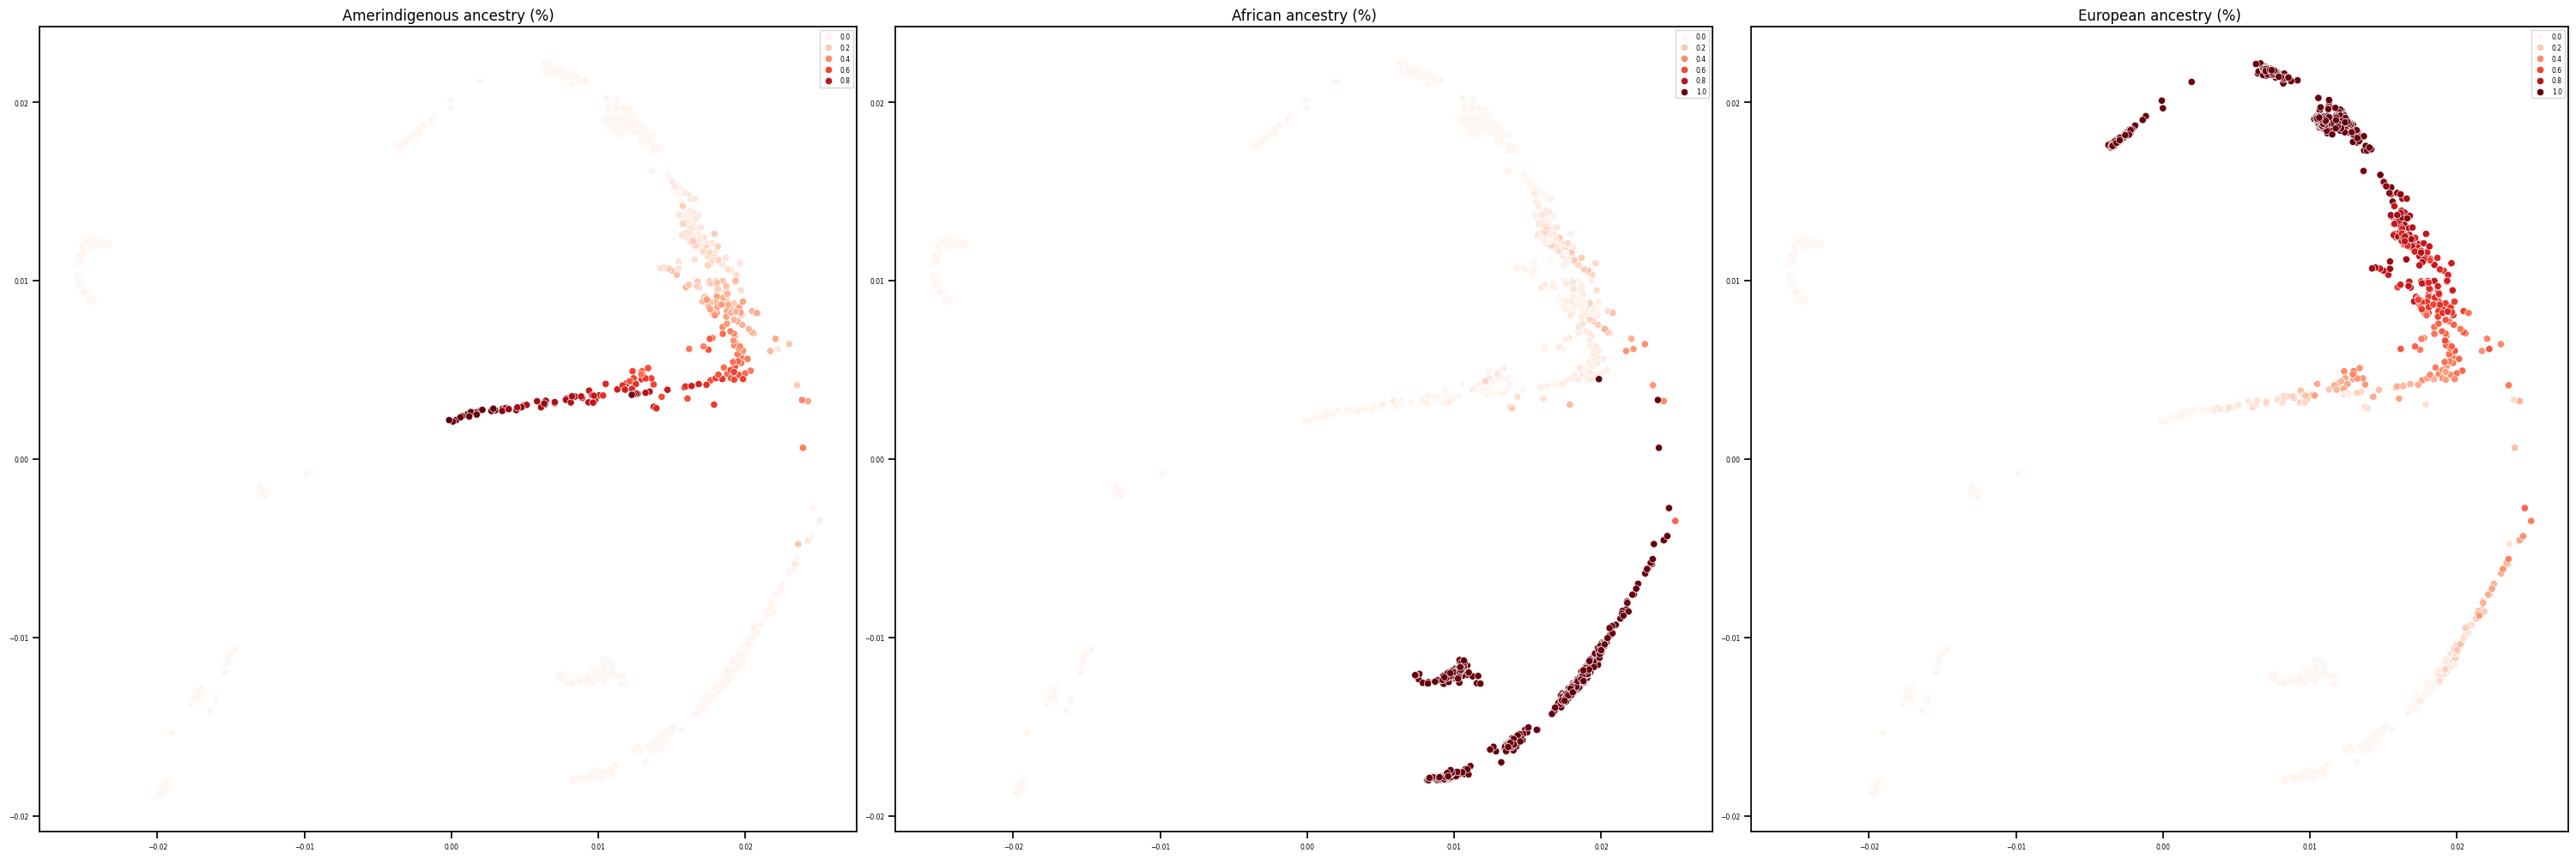

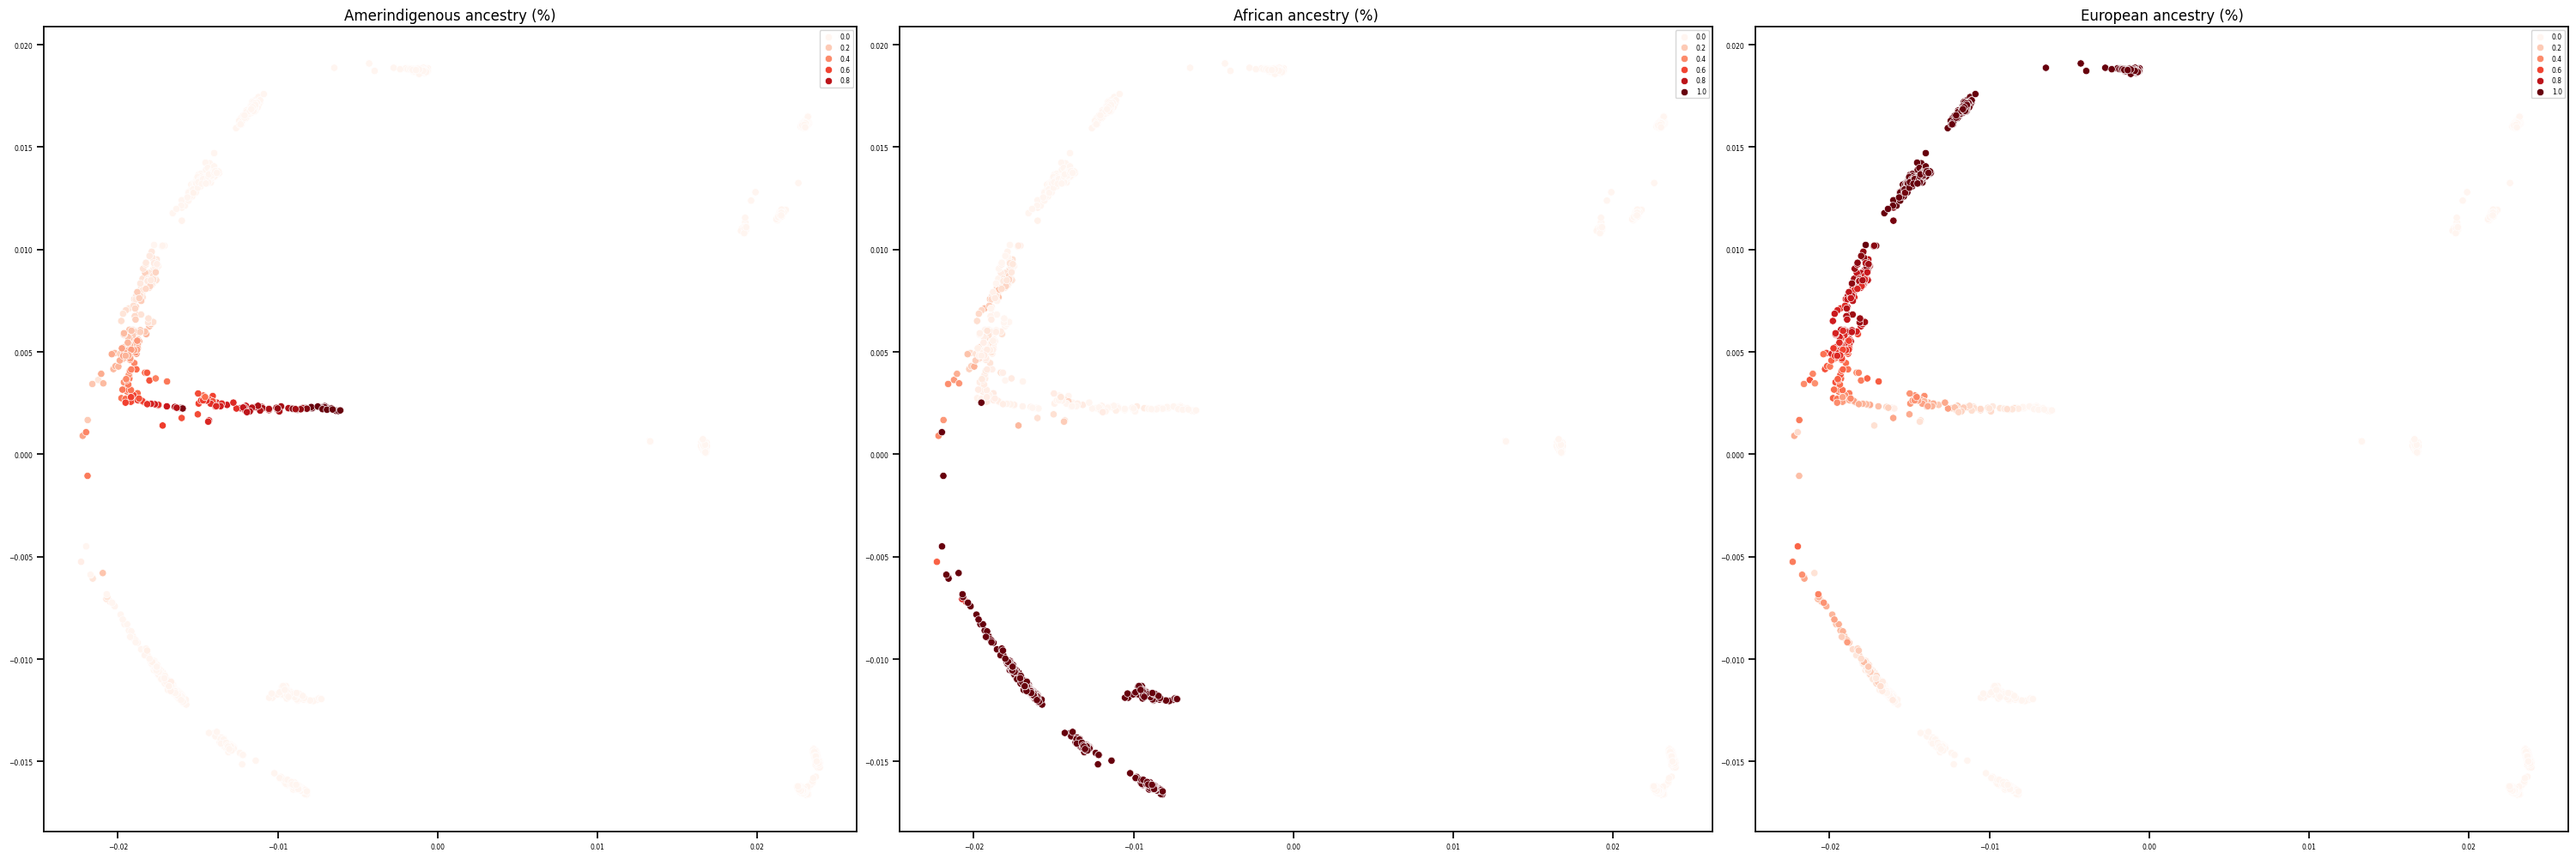

In [16]:
for t in (1,5,10,20):
# initial 2D phate embedding
    phate_operator42_2d = phate.PHATE(random_state=42, 
                                      n_components=2, 
                                      knn=5, 
                                      n_pca=None,
                                      decay=60,
                                      t=t,
                                      gamma=1.)
    phate_operator42_2d.fit(pca_input)
    phate_emb42_2d = phate_operator42_2d.transform()

    fig, ax = plt.subplots(ncols=3, figsize=(30,10))

    sns.scatterplot(x=phate_emb42_2d[:,0],
                    y=phate_emb42_2d[:,1],
                    hue=admix_labels_custom2[:,1],
                    palette='Reds',
                    ax=ax[0])
    ax[0].set_title("Amerindigenous ancestry (%)", fontsize=12)

    sns.scatterplot(x=phate_emb42_2d[:,0],
                    y=phate_emb42_2d[:,1],
                    hue=admix_labels_custom2[:,0],
                    palette='Reds',
                    ax=ax[1])
    ax[1].set_title("African ancestry (%)", fontsize=12)
    sns.scatterplot(x=phate_emb42_2d[:,0],
                    y=phate_emb42_2d[:,1],
                    hue=admix_labels_custom2[:,2],
                    palette='Reds',
                    ax=ax[2])
    ax[2].set_title("European ancestry (%)", fontsize=12)
    plt.tight_layout()